### Adyen Stock Price Time Series Analysis

In the rapidly evolving landscape of payment technology, where preferences diverge across age groups—older customers favoring cash or credit cards, while younger generations embrace digital wallets like PayMe, Alipay, and Fast Payment Services (FPS)—the payment process has become a ubiquitous yet critical component of every business. Often overlooked, payment serves as the backbone of commerce, and the adoption of unified commerce links diverse digital and physical channels, ensuring seamless data flow and communication across systems while preventing the loss of valuable insights. For instance, when a customer purchases clothing from an offline store with a credit card and later buys another item online using the same card, a unified commerce platform immediately recognizes this repeat behavior, signaling customer loyalty. This enables the company to enhance the customer experience through tailored recommendations, loyalty points, or vouchers, fostering retention.

Conversely, a common challenge in non-unified commerce systems arises when a customer purchases online but seeks to refund or exchange the item. Such systems often restrict returns to online processes, requiring a delivery service pickup and additional waiting time, potentially incurring extra charges and risking customer dissatisfaction or loss. Unified commerce addresses this by enabling data mapping and increasing convenience for all stakeholders, allowing seamless returns or exchanges at offline stores. Given these dynamics, Adyen N.V., a Dutch fintech leader founded in 2006, emerges as an ideal candidate for stock price analysis. Operating a unified platform for e-commerce, mobile, and point-of-sale transactions across Europe, North America, Asia-Pacific, Latin America, and beyond, Adyen has demonstrated robust market performance with a year-to-date return of approximately 9.65% and a 42.61% gain over the past 12 months as of September 2025. This project employs time series analysis, utilizing models such as ARIMA for forecasting, seasonal decomposition to identify cyclical patterns, and LSTM neural networks to uncover predictive trends, providing investors with actionable insights into Adyen's financial trajectory within the dynamic fintech sector.

In [5]:
# Requirements 
!pip install yfinance

In [6]:
!python -m pip install statsmodels 

In [7]:
import yfinance as yf
from datetime import date

ticker = 'ADYEN.AS'

start_date = '2023-08-01'
end_date = date.today()

data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
close = yf.download(ticker, start=start_date, end=end_date, interval="1d")["Close"]

/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_55543/2103475047.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed
/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_55543/2103475047.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  close = yf.download(ticker, start=start_date, end=end_date, interval="1d")["Close"]
[*********************100%***********************]  1 of 1 completed


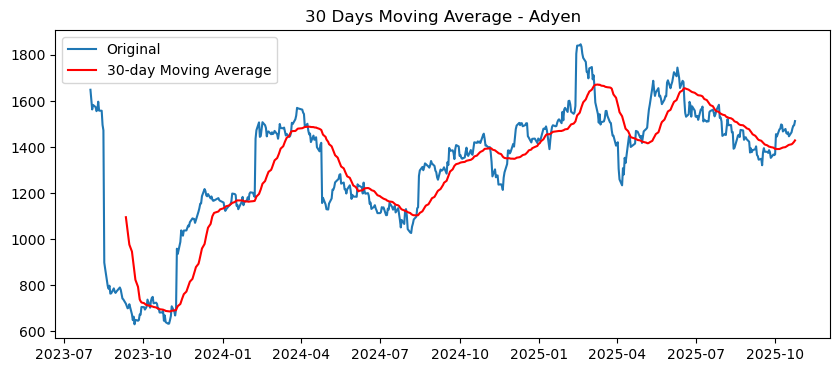

In [8]:
import matplotlib.pyplot as plt

# Moving Average (30 day window)
close_ma30 = close.rolling(window=30).mean()

plt.figure(figsize=(10,4))
plt.title("30 Days Moving Average - Adyen")
plt.plot(close, label="Original")
plt.plot(close_ma30, label="30-day Moving Average", color="red")
plt.legend(); plt.show()

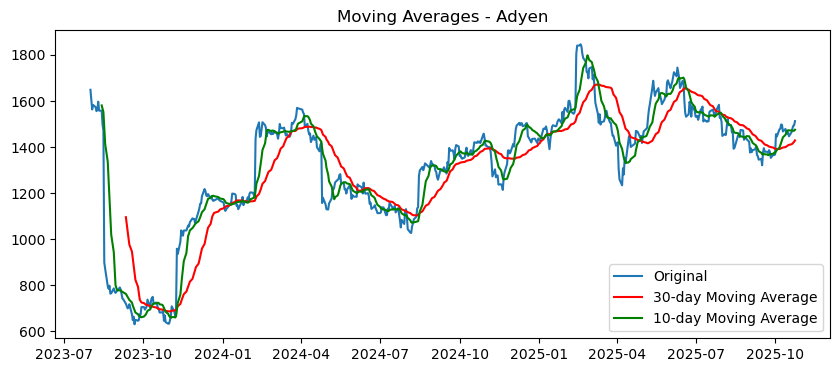

In [9]:
# 2. Closing Price data
close = data['Close']

# 3. Moving Average Calculations
close_ma30 = close.rolling(window=30).mean()
close_ma10 = close.rolling(window=10).mean()

# 4. Visualization
plt.figure(figsize=(10,4))
plt.title("Moving Averages - Adyen")
plt.plot(close, label="Original")
plt.plot(close_ma30, label="30-day Moving Average", color="red")
plt.plot(close_ma10, label="10-day Moving Average", color="green")
plt.legend()
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 572 entries, 2023-08-01 to 2025-10-24
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, ADYEN.AS)   572 non-null    float64
 1   (High, ADYEN.AS)    572 non-null    float64
 2   (Low, ADYEN.AS)     572 non-null    float64
 3   (Open, ADYEN.AS)    572 non-null    float64
 4   (Volume, ADYEN.AS)  572 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 26.8 KB


In [11]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,ADYEN.AS,ADYEN.AS,ADYEN.AS,ADYEN.AS,ADYEN.AS
Date,,,,,
2023-08-01,1648.599976,1697.000000,1632.800049,1681.000000,71241
2023-08-02,1608.000000,1636.000000,1598.199951,1626.199951,55635
2023-08-03,1563.199951,1606.400024,1555.400024,1591.599976,63551
2023-08-04,1582.800049,1585.199951,1551.000000,1570.000000,61214
2023-08-07,1573.400024,1587.400024,1565.000000,1574.800049,36479


/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_55543/1811032282.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = close.resample("M").mean()


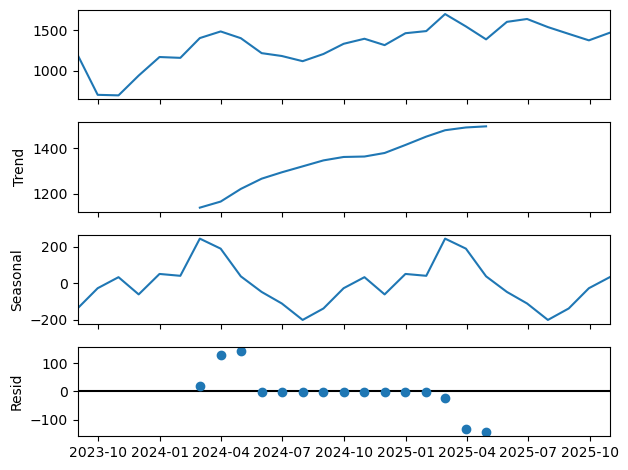

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Monthly Average
monthly = close.resample("M").mean()  
result = seasonal_decompose(monthly, model="additive", period=12)
result.plot(); plt.show()


In [13]:
import pandas as pd
tmp_series = data['Close']

series = tmp_series.reset_index(drop=True)
series

Ticker,ADYEN.AS
0,1648.599976
1,1608.000000
2,1563.199951
3,1582.800049
4,1573.400024
...,...
567,1464.000000
568,1480.400024
569,1492.199951
570,1494.199951


In [14]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# ARIMA(1,1,1)
model1 = ARIMA(series, order=(1,1,1)).fit()
print("ARIMA(1,1,1) Prediction:", model1.forecast(steps=2))

# ARIMA(2,1,0)
model2 = ARIMA(series, order=(2,1,0)).fit()
print("ARIMA(2,1,0) Prediction:", model2.forecast(steps=2))

# ARIMA(0,1,2)
model3 = ARIMA(series, order=(0,1,2)).fit()
print("ARIMA(0,1,2) Prediction:", model3.forecast(steps=2))


ARIMA(1,1,1) Prediction: 572    1514.706676
573    1516.218494
Name: predicted_mean, dtype: float64
ARIMA(2,1,0) Prediction: 572    1513.64908
573    1515.85925
Name: predicted_mean, dtype: float64
ARIMA(0,1,2) Prediction: 572    1513.322571
573    1515.262833
Name: predicted_mean, dtype: float64


In [15]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,ADYEN.AS,ADYEN.AS,ADYEN.AS,ADYEN.AS,ADYEN.AS
Date,,,,,
2023-08-01,1648.599976,1697.000000,1632.800049,1681.000000,71241
2023-08-02,1608.000000,1636.000000,1598.199951,1626.199951,55635
2023-08-03,1563.199951,1606.400024,1555.400024,1591.599976,63551
2023-08-04,1582.800049,1585.199951,1551.000000,1570.000000,61214
2023-08-07,1573.400024,1587.400024,1565.000000,1574.800049,36479


In [16]:
# Train-test split 
train = data.loc['2023-08-01':'2025-08-01']
test = data.loc['2025-08-01':]
features = ['High', 'Low', 'Open']
X_train = train[features]
y_train = train['Close']
X_test = test[features]
y_test = test['Close']

In [17]:
!python3 -m pip install scikit-learn

In [18]:
!python3 -m pip install xgboost

In [19]:
!pip install xgboost --no-cache-dir

In [20]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Confirm this

In [21]:
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
!brew install libomp

To reinstall 21.1.4, run:
  brew reinstall libomp


In [23]:
!pip3 install xgboost

In [24]:
from xgboost import XGBRegressor

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
pred_xgb = xgb_model.predict(X_test)

# Error metrics (now works with import)
mae_xgb = mean_absolute_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
print(f'XGBoost - MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}')

XGBoost - MAE: 12.44, RMSE: 20.70


ARIMA 
Mean Absolute Error (MAE): 89.69 
Root Mean Squared Error (RMSE): 102.69


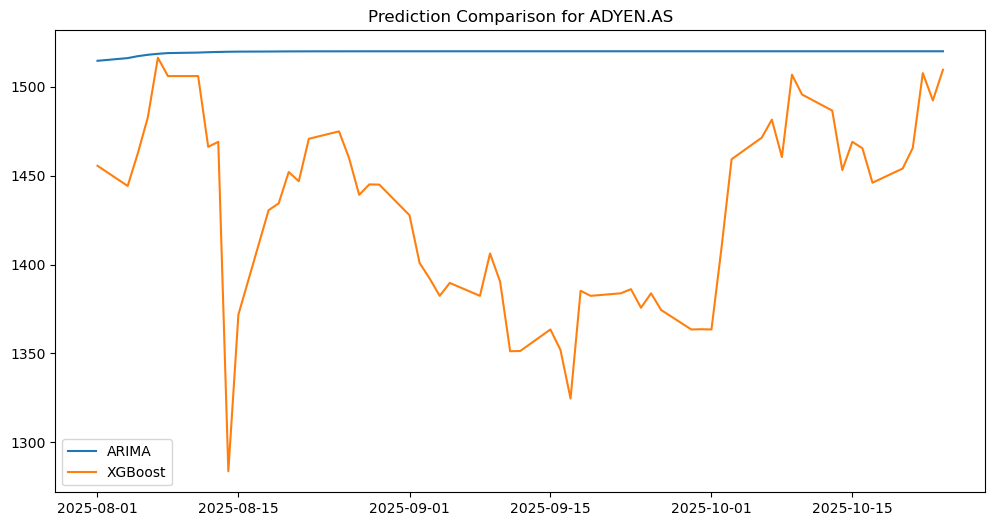

     Model        MAE        RMSE
0    ARIMA  89.692696  102.691031
1  XGBoost  12.442015   20.703970


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

arima_model = ARIMA(series, order=(1,1,1)).fit()
pred_arima = arima_model.forecast(steps=len(test))
mae_arima = mean_absolute_error(y_test, pred_arima)
rmse_arima = np.sqrt(mean_squared_error(y_test, pred_arima))
print(f'ARIMA \nMean Absolute Error (MAE): {mae_arima:.2f} \nRoot Mean Squared Error (RMSE): {rmse_arima:.2f}')

# Plot all predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test.index, pred_arima, label='ARIMA')
plt.plot(test.index, pred_xgb, label='XGBoost')
plt.title(f'Prediction Comparison for {ticker}')
plt.legend()
plt.show()

# Summary table
metrics = pd.DataFrame({
    'Model': ['ARIMA', 'XGBoost'],
    'MAE': [mae_arima, mae_xgb],
    'RMSE': [rmse_arima, rmse_xgb]
})
print(metrics)

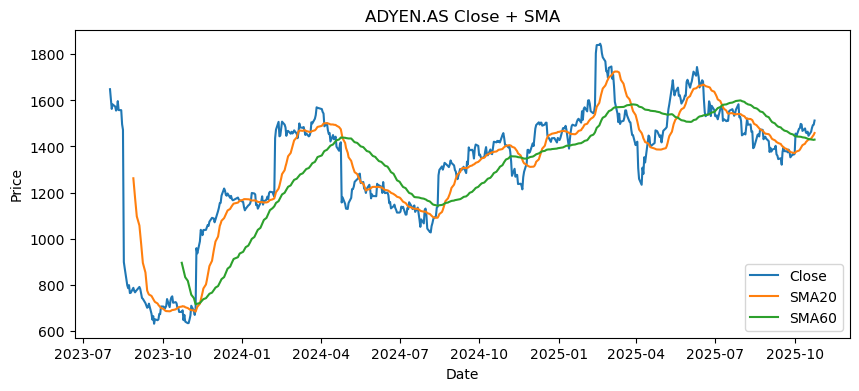

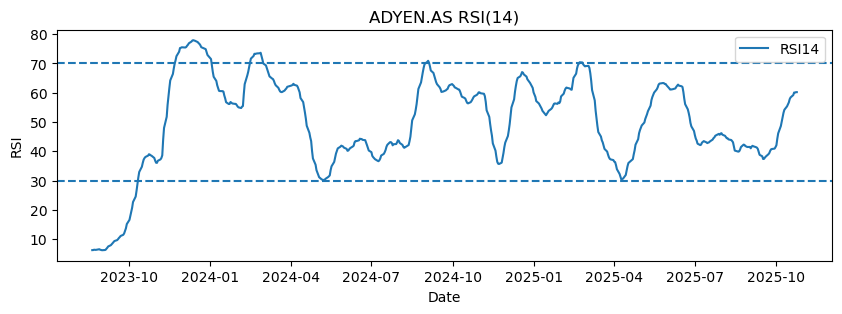

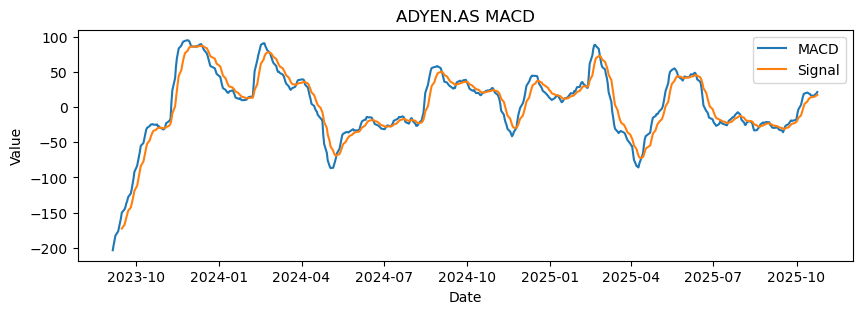

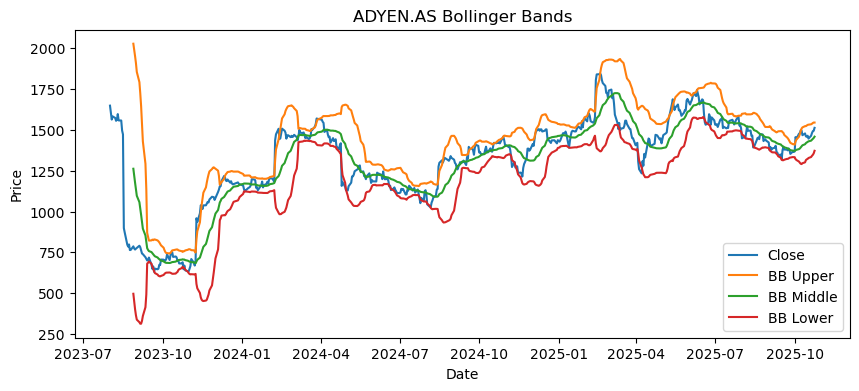

/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_55543/2293357943.py:89: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  position = sig.replace(to_replace=0, method="ffill").clip(-1, 1)


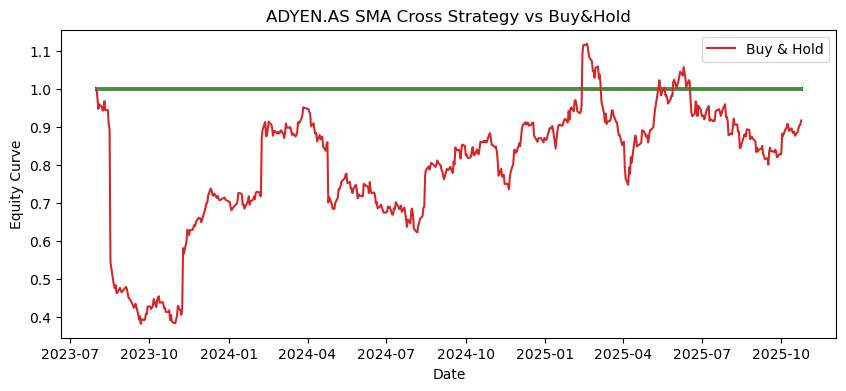

전략 누적수익률: ADYEN.AS               0.0
2023-08-01 00:00:00    0.0
2023-08-02 00:00:00    0.0
2023-08-03 00:00:00    0.0
2023-08-04 00:00:00    0.0
                      ... 
2025-10-20 00:00:00    0.0
2025-10-21 00:00:00    0.0
2025-10-22 00:00:00    0.0
2025-10-23 00:00:00    0.0
2025-10-24 00:00:00    0.0
Name: 2025-10-24 00:00:00, Length: 573, dtype: float64
바이앤홀드: Ticker
ADYEN.AS   -0.0825
Name: 2025-10-24 00:00:00, dtype: float64


In [32]:
# ===== 2) 함수들 =====
def SMA(series: pd.Series, n: int) -> pd.Series:
    return series.rolling(window=n, min_periods=n).mean()

def EMA(series: pd.Series, n: int) -> pd.Series:
    return series.ewm(span=n, adjust=False, min_periods=n).mean()

def RSI(series: pd.Series, n: int = 14) -> pd.Series:
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(n, min_periods=n).mean().ewm(alpha=1/n, adjust=False).mean()
    avg_loss = loss.rolling(n, min_periods=n).mean().ewm(alpha=1/n, adjust=False).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

def MACD(series: pd.Series, fast=12, slow=26, signal=9):
    ema_fast = EMA(series, fast)
    ema_slow = EMA(series, slow)
    macd = ema_fast - ema_slow
    signal_line = EMA(macd, signal)
    hist = macd - signal_line
    return macd, signal_line, hist

def bollinger_bands(series: pd.Series, n=20, k=2.0):
    mid = SMA(series, n)
    std = series.rolling(n, min_periods=n).std()
    upper = mid + k * std
    lower = mid - k * std
    return upper, mid, lower

def stochastic_oscillator(df: pd.DataFrame, n=14, d=3):
    low_min = df["Low"].rolling(window=n, min_periods=n).min()
    high_max = df["High"].rolling(window=n, min_periods=n).max()
    k = (df["Close"] - low_min) / (high_max - low_min) * 100
    d_line = k.rolling(window=d, min_periods=d).mean()
    return k, d_line

def ATR(df: pd.DataFrame, n=14) -> pd.Series:
    prev_close = df["Close"].shift(1)
    tr = pd.concat([
        df["High"] - df["Low"],
        (df["High"] - prev_close).abs(),
        (df["Low"] - prev_close).abs()
    ], axis=1).max(axis=1)
    return tr.rolling(window=n, min_periods=n).mean()

# ===== 3) 지표 계산 =====
data["SMA20"], data["SMA60"] = SMA(data["Close"], 20), SMA(data["Close"], 60)
data["EMA20"], data["EMA60"] = EMA(data["Close"], 20), EMA(data["Close"], 60)
data["RSI14"] = RSI(data["Close"], 14)
(data["MACD"], data["MACDsig"], data["MACDhist"]) = MACD(data["Close"], 12, 26, 9)
(data["BBU"], data["BBM"], data["BBL"]) = bollinger_bands(data["Close"], 20, 2.0)
(data["%K"], data["%D"]) = stochastic_oscillator(data, 14, 3)
data["ATR14"] = ATR(data, 14)

# ===== 4) 시각화 예시(한 그래프당 한 지표) =====
plt.figure(figsize=(10,4))
plt.plot(data.index, data["Close"], label="Close")
plt.plot(data.index, data["SMA20"], label="SMA20")
plt.plot(data.index, data["SMA60"], label="SMA60")
plt.legend(); plt.title(f"{ticker} Close + SMA"); plt.xlabel("Date"); plt.ylabel("Price")
plt.show()

plt.figure(figsize=(10,3))
plt.plot(data.index, data["RSI14"], label="RSI14")
plt.axhline(70, linestyle="--"); plt.axhline(30, linestyle="--")
plt.legend(); plt.title(f"{ticker} RSI(14)"); plt.xlabel("Date"); plt.ylabel("RSI")
plt.show()

plt.figure(figsize=(10,3))
plt.plot(data.index, data["MACD"], label="MACD")
plt.plot(data.index, data["MACDsig"], label="Signal")
plt.legend(); plt.title(f"{ticker} MACD"); plt.xlabel("Date"); plt.ylabel("Value")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(data.index, data["Close"], label="Close")
plt.plot(data.index, data["BBU"], label="BB Upper")
plt.plot(data.index, data["BBM"], label="BB Middle")
plt.plot(data.index, data["BBL"], label="BB Lower")
plt.legend(); plt.title(f"{ticker} Bollinger Bands"); plt.xlabel("Date"); plt.ylabel("Price")
plt.show()

# ===== 5) 간단 전략: SMA20-60 크로스 =====
sig = pd.Series(0, index=data.index)
sig[(data["SMA20"].shift(1) < data["SMA60"].shift(1)) & (data["SMA20"] >= data["SMA60"]) ] = 1
sig[(data["SMA20"].shift(1) > data["SMA60"].shift(1)) & (data["SMA20"] <= data["SMA60"]) ] = -1
position = sig.replace(to_replace=0, method="ffill").clip(-1, 1)
ret = data["Close"].pct_change()
strat_ret = position.shift(1) * ret
cum_eq = (1 + strat_ret.fillna(0)).cumprod()
buyhold = (1 + ret.fillna(0)).cumprod()

plt.figure(figsize=(10,4))
plt.plot(cum_eq.index, cum_eq)
plt.plot(buyhold.index, buyhold, label="Buy & Hold")
plt.legend(); plt.title(f"{ticker} SMA Cross Strategy vs Buy&Hold"); plt.xlabel("Date"); plt.ylabel("Equity Curve")
plt.show()

print("전략 누적수익률:", round(cum_eq.iloc[-1]-1, 4))
print("바이앤홀드:", round(buyhold.iloc[-1]-1, 4))
